In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
from scipy import optimize
from scipy.optimize import curve_fit
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

In [367]:
# import voltages, from new exp

x = np.genfromtxt('/Users/chris/Desktop/voltages/Vin1.csv',delimiter=',')[:,0]
x_width = x[1]-x[0]
print(x_width)

Vin1 = np.genfromtxt('/Users/chris/Desktop/voltages/Vin1.csv',delimiter=',')[:,1]
Vin2 = np.genfromtxt('/Users/chris/Desktop/voltages/Vin2.csv',delimiter=',')[:,1]
Vin3 = np.genfromtxt('/Users/chris/Desktop/voltages/Vin3.csv',delimiter=',')[:,1]
Vin4 = np.genfromtxt('/Users/chris/Desktop/voltages/Vin4.csv',delimiter=',')[:,1]
Vin5 = np.genfromtxt('/Users/chris/Desktop/voltages/Vin5.csv',delimiter=',')[:,1]
Vin6 = np.genfromtxt('/Users/chris/Desktop/voltages/Vin6.csv',delimiter=',')[:,1]

Vout1 = np.genfromtxt('/Users/chris/Desktop/voltages/Vout1.csv',delimiter=',')[:,1] * 1.3
Vout2 = np.genfromtxt('/Users/chris/Desktop/voltages/Vout2.csv',delimiter=',')[:,1] * 1.3
Vout3 = np.genfromtxt('/Users/chris/Desktop/voltages/Vout3.csv',delimiter=',')[:,1] * 1.3
Vout4 = np.genfromtxt('/Users/chris/Desktop/voltages/Vout4.csv',delimiter=',')[:,1] * 1.3
Vout5 = np.genfromtxt('/Users/chris/Desktop/voltages/Vout5.csv',delimiter=',')[:,1] * 1.3
Vout6 = np.genfromtxt('/Users/chris/Desktop/voltages/Vout6.csv',delimiter=',')[:,1] * 1.3

# average voltages to create ave

Vinf = (Vin1+Vin2+Vin3+Vin4+Vin5+Vin6)/6
Voutf = (Vout1+Vout2+Vout3+Vout4+Vout5+Vout6)/6 

dVinf = 1/np.sqrt(6) * np.sqrt(1/6 * ( (Vin1-Vinf)**2 + (Vin2-Vinf)**2 + (Vin3-Vinf)**2 + (Vin4-Vinf)**2 + (Vin5-Vinf)**2 + (Vin6-Vinf)**2))
dVoutf = 1/np.sqrt(6) * np.sqrt(1/6 * ( (Vout1-Voutf)**2 + (Vout2-Voutf)**2 + (Vout3-Voutf)**2 + (Vout4-Voutf)**2 + (Vout5-Voutf)**2 + (Vout6-Voutf)**2))

# find stdev of 

f = x[96:320] # range of freq
Vin = np.array(Vinf[96:320])
Vout = np.array(Voutf[96:320])

dVin = np.array(dVinf[96:320])
dVout = np.array(dVoutf[96:320])

31.25


Text(0.5, 1.05, 'Output of White Noise without Amp Chain on Spectral Analyzer')

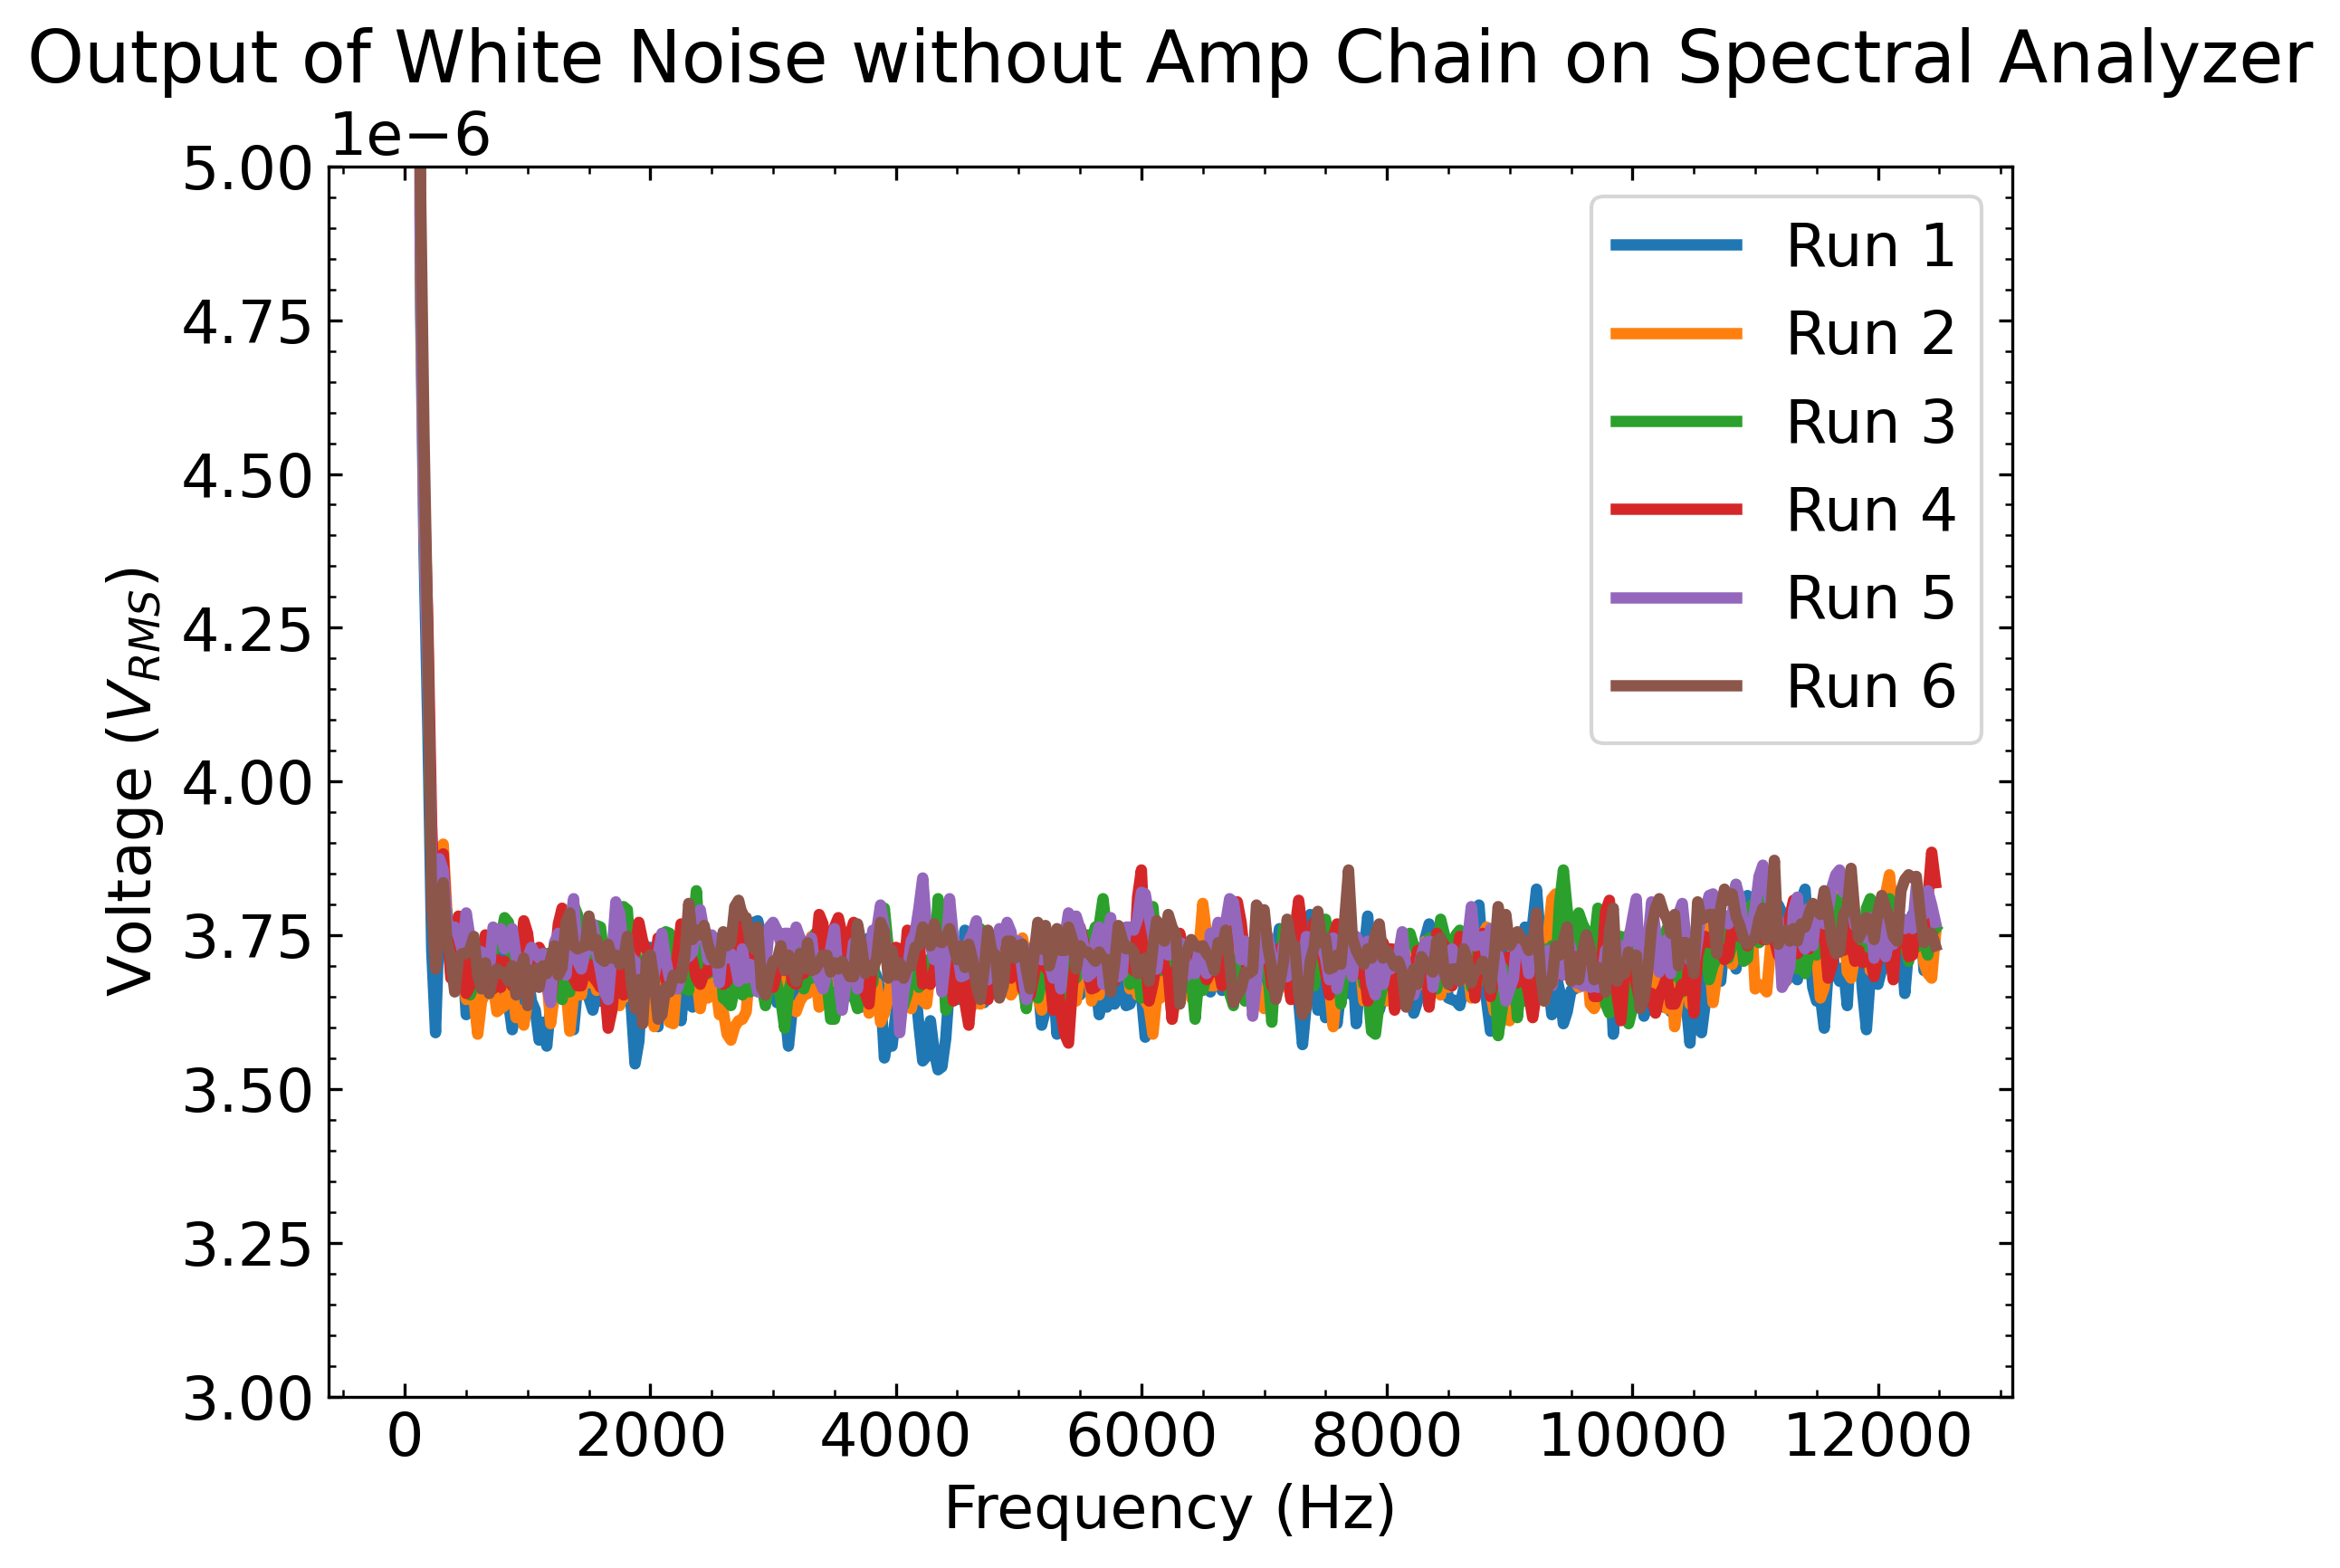

In [503]:
# plot Vin

plt.figure(figsize=(8,6),dpi=300)
plt.plot(x,Vin1,label = "Run 1")
plt.plot(x,Vin2,label = "Run 2")
plt.plot(x,Vin3,label = "Run 3")
plt.plot(x,Vin4,label = "Run 4")
plt.plot(x,Vin5,label = "Run 5")
plt.plot(x,Vin6,label = "Run 6")
plt.ylim(0.3e-5,0.5e-5)
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'Voltage $(V_{RMS})$')
plt.legend()
plt.title("Output of White Noise without Amp Chain on Spectral Analyzer",y=1.05)

Text(0.5, 1.0, 'Output of White Noise through Amp Chain on Spectral Analyzer')

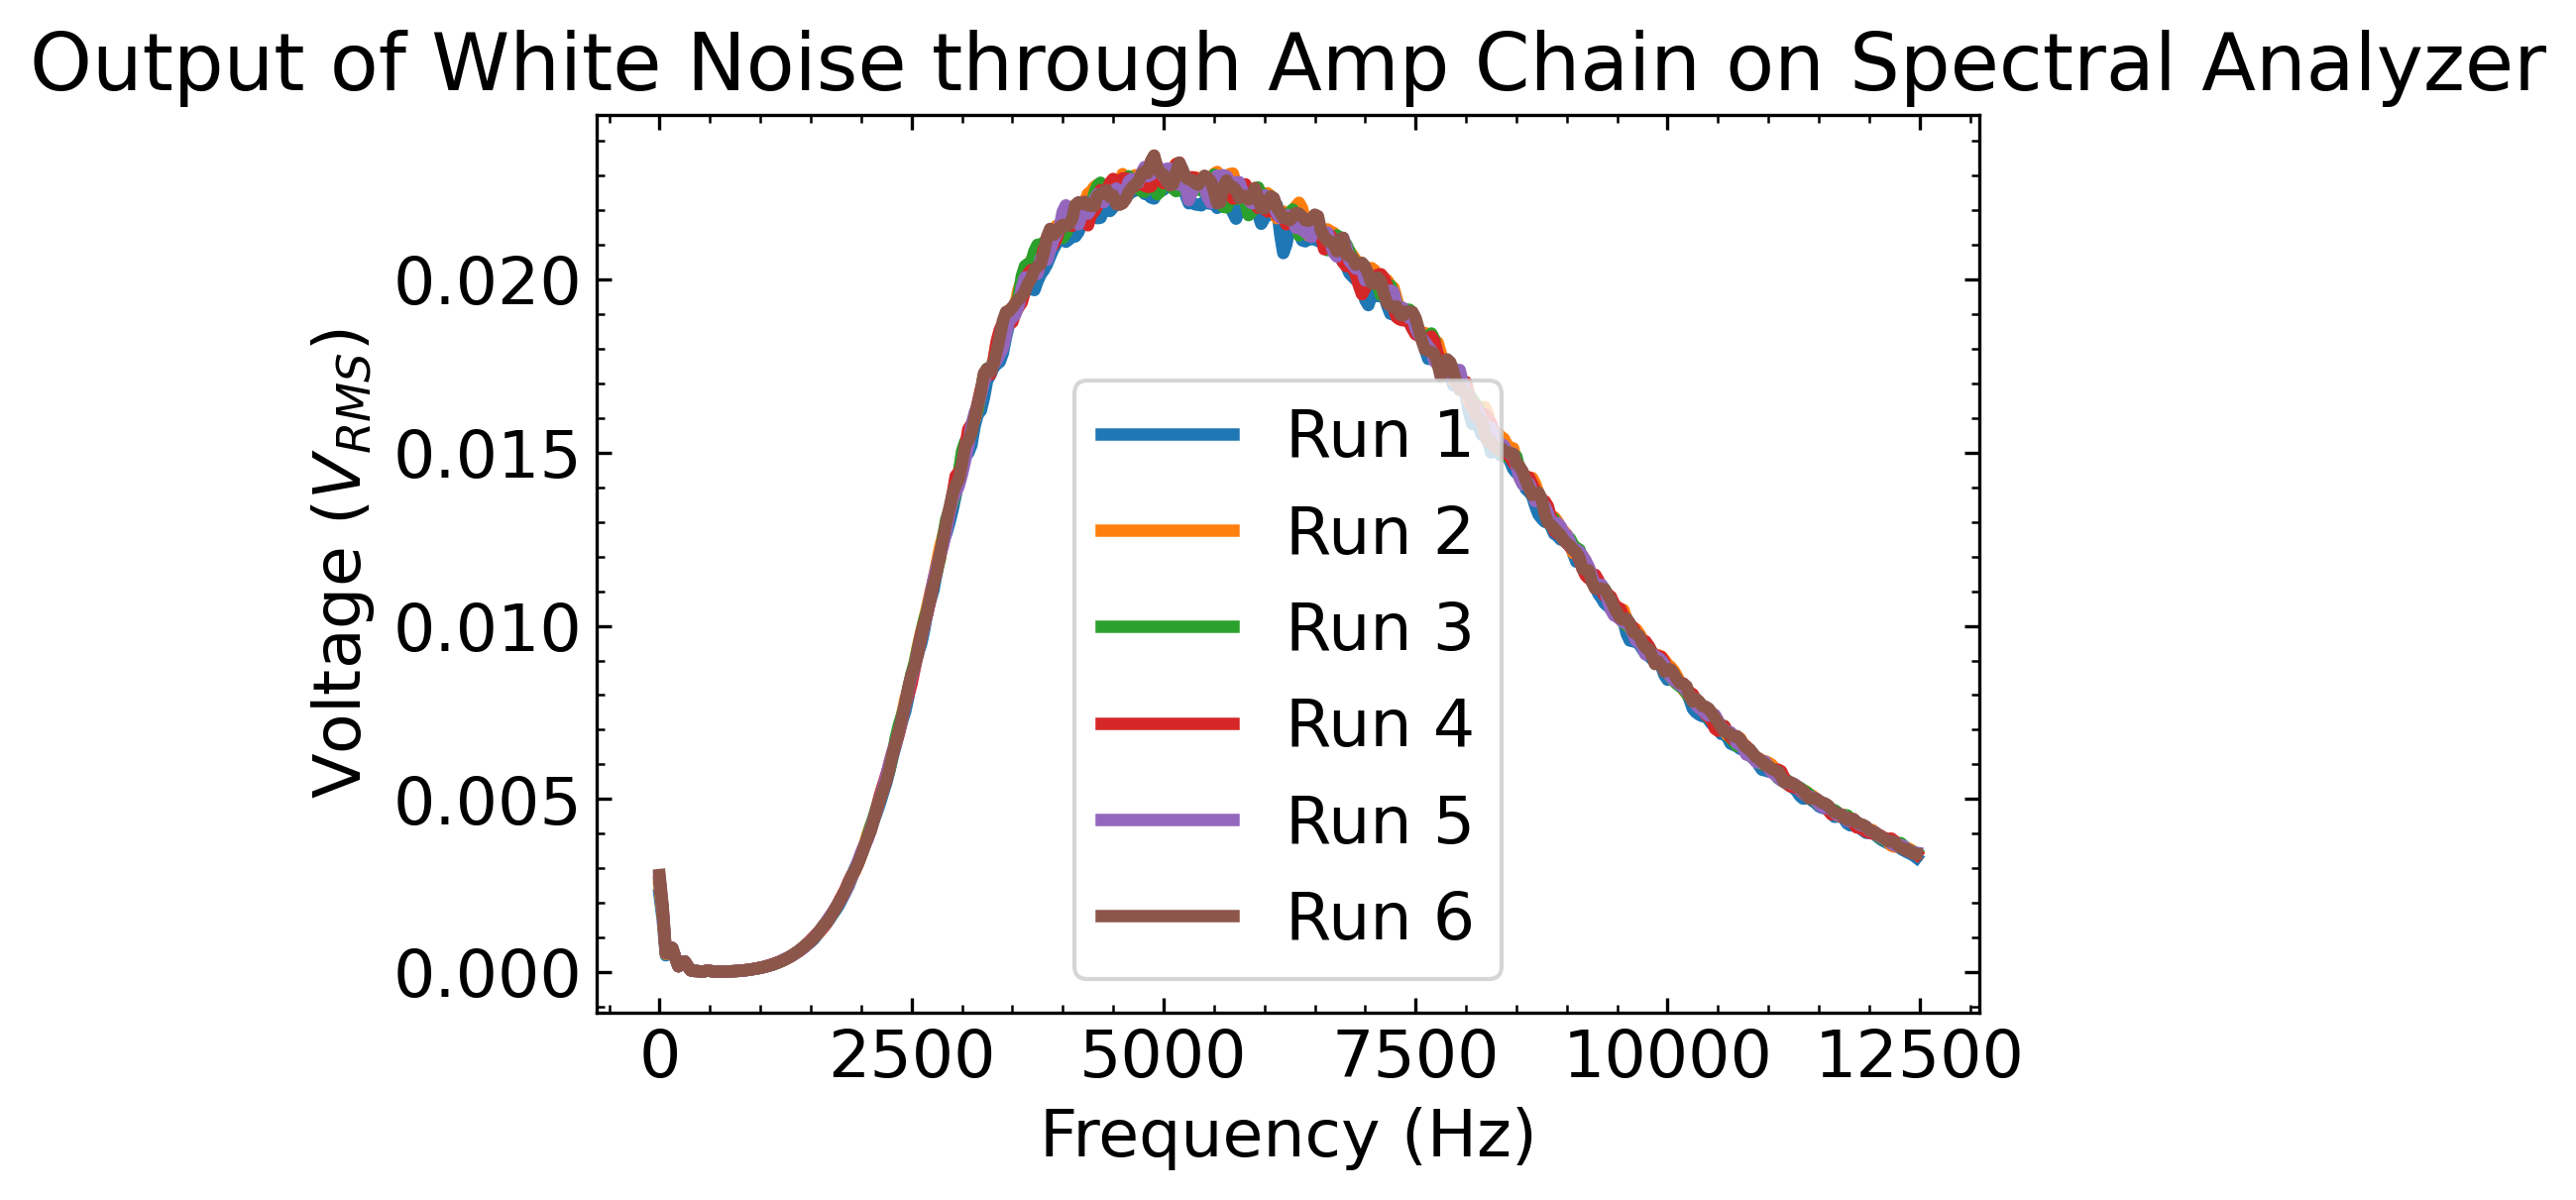

In [348]:
# plot Vout
plt.figure(dpi=300)
plt.plot(x,Vout1,label = "Run 1")
plt.plot(x,Vout2,label = "Run 2")
plt.plot(x,Vout3,label = "Run 3")
plt.plot(x,Vout4,label = "Run 4")
plt.plot(x,Vout5,label = "Run 5")
plt.plot(x,Vout6,label = "Run 6")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'Voltage $(V_{RMS})$')
plt.legend()
plt.title("Output of White Noise through Amp Chain on Spectral Analyzer")

<ErrorbarContainer object of 3 artists>

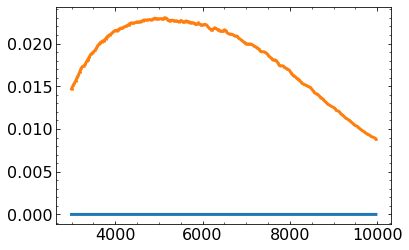

In [362]:
# plot in and out with errorbars

plt.errorbar(f,Vin,yerr=dVin)
plt.errorbar(f,Vout,yerr=dVout)

Text(0.5, 1.0, 'Gain of Amp Chain')

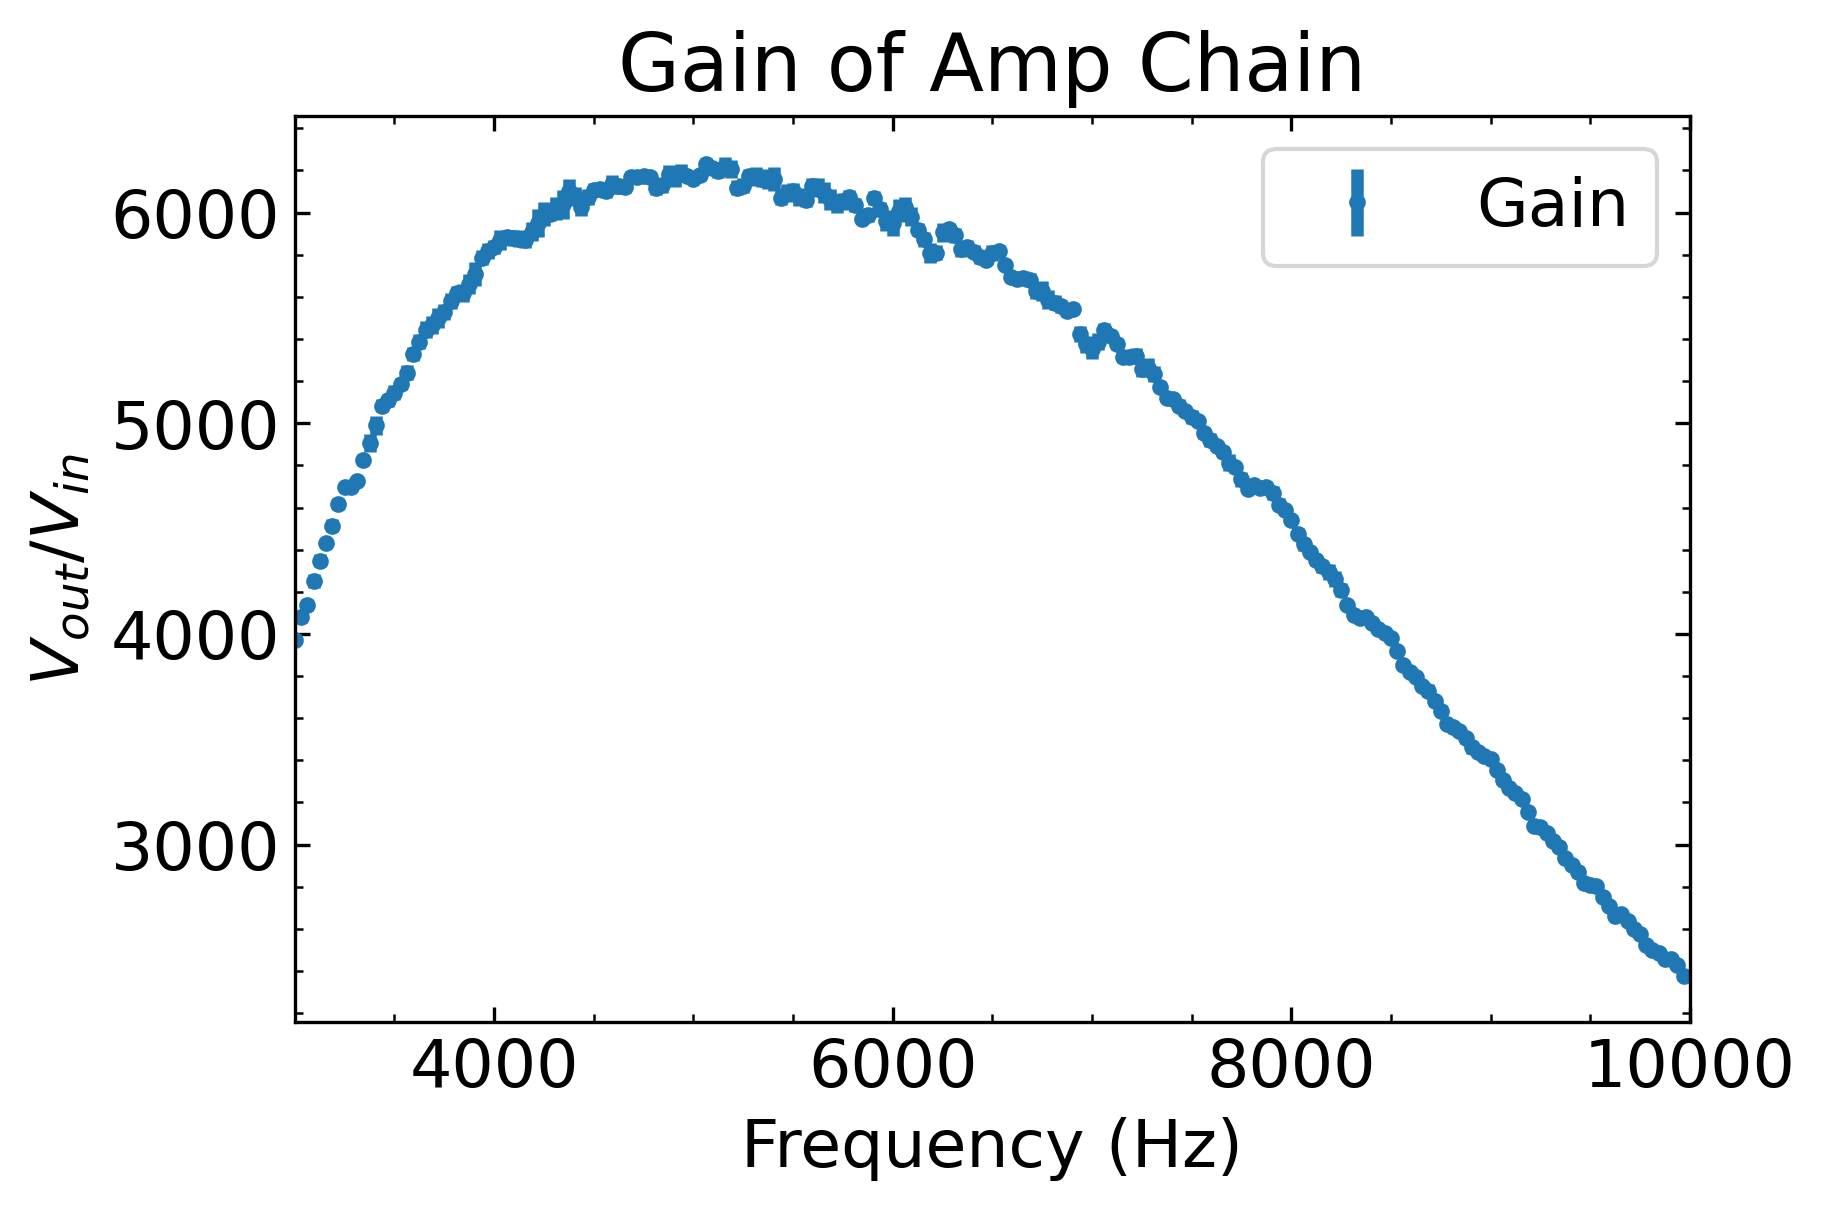

In [366]:
# calculate and plot gains
gain = Vout/Vin
dgain = 1/Vin * np.sqrt((dVin*gain)**2+dVout**2)

plt.figure(dpi=300)
plt.errorbar(f,gain,yerr=dgain,linestyle='',marker='.',label="Gain")
plt.xlim(3000,10000)
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'$V_{out}/V_{in}$')
plt.legend()
plt.title("Gain of Amp Chain")

In [257]:
# old DBV, exponential averaging data from Day 1

Noisein_old1 = np.genfromtxt('/Users/chris/Desktop/base.csv',delimiter=',')
Noiseout_old1 = np.genfromtxt('/Users/chris/Desktop/ampilified.csv',delimiter=',')
x_old1 = white_noise[:,0]
Vin_old1 = 10**(Noisein_old1[:,1]/20)
Vout_old1 = 10**(Noiseout_old1[:,1]/20)
gain_old1_full = Vout_old1/Vin_old1
gain_old1 = gain_old1_full[12:12+28]

In [258]:
# old data, collected from Day 2

white_noise = np.genfromtxt('/Users/chris/Desktop/V_in.csv',delimiter=',')
amplified_noise = np.genfromtxt('/Users/chris/Desktop/V_out.csv',delimiter=',')
x_old2 = white_noise[:,0]
Vin_old2 = white_noise[:,1]
Vout_old2 = amplified_noise[:,1]
gain_old2_full = Vout_old2/Vin_old2
gain_old2 = gain_old2_full[12:12+28]

In [ ]:
# gains are gain_new, gain_old1, gain_old2
# new gain has size 224 in range (3000,10000)
# old gains have size 28 in range(3000,10000)

[   996.   9980.  20100.  35200.  48700. 100500.]


In [452]:
# Calculate G using new data

C = 11.46e-12 #Farads
dc = 0.120e-12 

R = np.array([0.996,9.98,20.1,35.2,48.7,100.5])*1e3 # Ohms
dR = np.array([0.013,0.13,0.2,0.3,0.3,0.6])*1e3 #Ohms

gi = gain
dgi = dgain


Gi1 = gi**2/(1+(2*np.pi*f*C*R[0]))
Gi2 = gi**2/(1+(2*np.pi*f*C*R[1]))
Gi3 = gi**2/(1+(2*np.pi*f*C*R[2]))
Gi4 = gi**2/(1+(2*np.pi*f*C*R[3]))
Gi5 = gi**2/(1+(2*np.pi*f*C*R[4]))
Gi6 = gi**2/(1+(2*np.pi*f*C*R[5]))

dGi1 = 2*Gi1 * np.sqrt((dgi/gi)**2 + 16*np.pi**4*f**4*(1+(2*np.pi*C*R[0]*f)**2)**(-2)*(C**4*R[0]**2*dR[0]**2 + dc**2*(R[0]**4*C**2)))
dGi2 = 2*Gi2 * np.sqrt((dgi/gi)**2 + 16*np.pi**4*f**4*(1+(2*np.pi*C*R[1]*f)**2)**(-2)*(C**4*R[1]**2*dR[1]**2 + dc**2*(R[1]**4*C**2)))
dGi3 = 2*Gi3 * np.sqrt((dgi/gi)**2 + 16*np.pi**4*f**4*(1+(2*np.pi*C*R[2]*f)**2)**(-2)*(C**4*R[2]**2*dR[2]**2 + dc**2*(R[2]**4*C**2)))
dGi4 = 2*Gi4 * np.sqrt((dgi/gi)**2 + 16*np.pi**4*f**4*(1+(2*np.pi*C*R[3]*f)**2)**(-2)*(C**4*R[3]**2*dR[3]**2 + dc**2*(R[3]**4*C**2)))
dGi5 = 2*Gi5 * np.sqrt((dgi/gi)**2 + 16*np.pi**4*f**4*(1+(2*np.pi*C*R[4]*f)**2)**(-2)*(C**4*R[4]**2*dR[4]**2 + dc**2*(R[4]**4*C**2)))
dGi6 = 2*Gi6 * np.sqrt((dgi/gi)**2 + 16*np.pi**4*f**4*(1+(2*np.pi*C*R[5]*f)**2)**(-2)*(C**4*R[5]**2*dR[5]**2 + dc**2*(R[5]**4*C**2)))


# integrate G

def sum(var):
    sum = 0
    for i in range(np.size(var)):
        sum += var[i]
    sum = sum*x_width
    return(sum)

# add dGis

def usum(var):
    sum = 0
    for i in range(np.size(var)):
        sum += (var[i]*x_width)**2
    sum = np.sqrt(sum)
    return(sum)

G1 = sum(Gi1)
G2 = sum(Gi2)
G3 = sum(Gi3)
G4 = sum(Gi4)
G5 = sum(Gi5)
G6 = sum(Gi6)

dG1 = usum(dGi1)
dG2 = usum(dGi2)
dG3 = usum(dGi3)
dG4 = usum(dGi4)
dG5 = usum(dGi5)
dG6 = usum(dGi6)

G = np.array([G1,G2,G3,G4,G5,G6])
dG = np.array([dG1,dG2,dG3,dG4,dG5,dG6])
              
                                                                             
# def integrand(R):
#   return(gain**2/(1+(2*np.pi*f*C*R)**2))


# def integrate(R):
#     sum = 0
#    dx = x_width
#    y = integrand(R)
#    for i in range(223):
#        sum += (y[i]+y[i+1])/2 * dx
#    return(sum)
                
# Calculate G's, use the rough estimates for R
# G1 = integrate(1e3)
# G2 = integrate(1e4)
# G3 = integrate(2e4)
# G4 = integrate(3.52e4)
# G5 = integrate(48.7e3)
# G6 = integrate(100e3)

print(G*1e-11)
print(dG*1e-11)

1.2791097351396699
[0.09499841 0.09502226 0.09504893 0.09508837 0.09512327 0.09525452]
[1.82043195 1.81352172 1.80580524 1.79442237 1.78437583 1.74692481]
[0.00172938 0.00172325 0.0017164  0.00170629 0.00169736 0.00166402]


In [311]:
# calculate G using old data

f_old = x_old1[12:12+28]
def integrand(R):
    return(gain_old1**2/(1+(2*np.pi*f_old*C*R)**2))


def integrate(R):
    sum = 0
    dx = f_old[1]-f_old[0]
    y = integrand(R)
    for i in range(27):
        sum += (y[i]+y[i+1])/2 * dx
    return(sum)
                
# Calculate G's, use the rough estimates for R
G1_old = integrate(1e3)
G2_old = integrate(1e4)
G3_old = integrate(2e4)
G4_old = integrate(3.52e4)
G5_old = integrate(48.7e3)
G6_old = integrate(100e3)
G_old = np.array([G1_old,G2_old,G3_old,G4_old,G5_old,G6_old])
print(G_old*1e-11)

[1.79329772 1.79326425 1.79316284 1.7928793  1.79249672 1.78992559]


317.721213839306 +/- 13.045184300079164
298.221213839306 +/- 13.054762863531145
9.17855165268389 1.9204648986266304


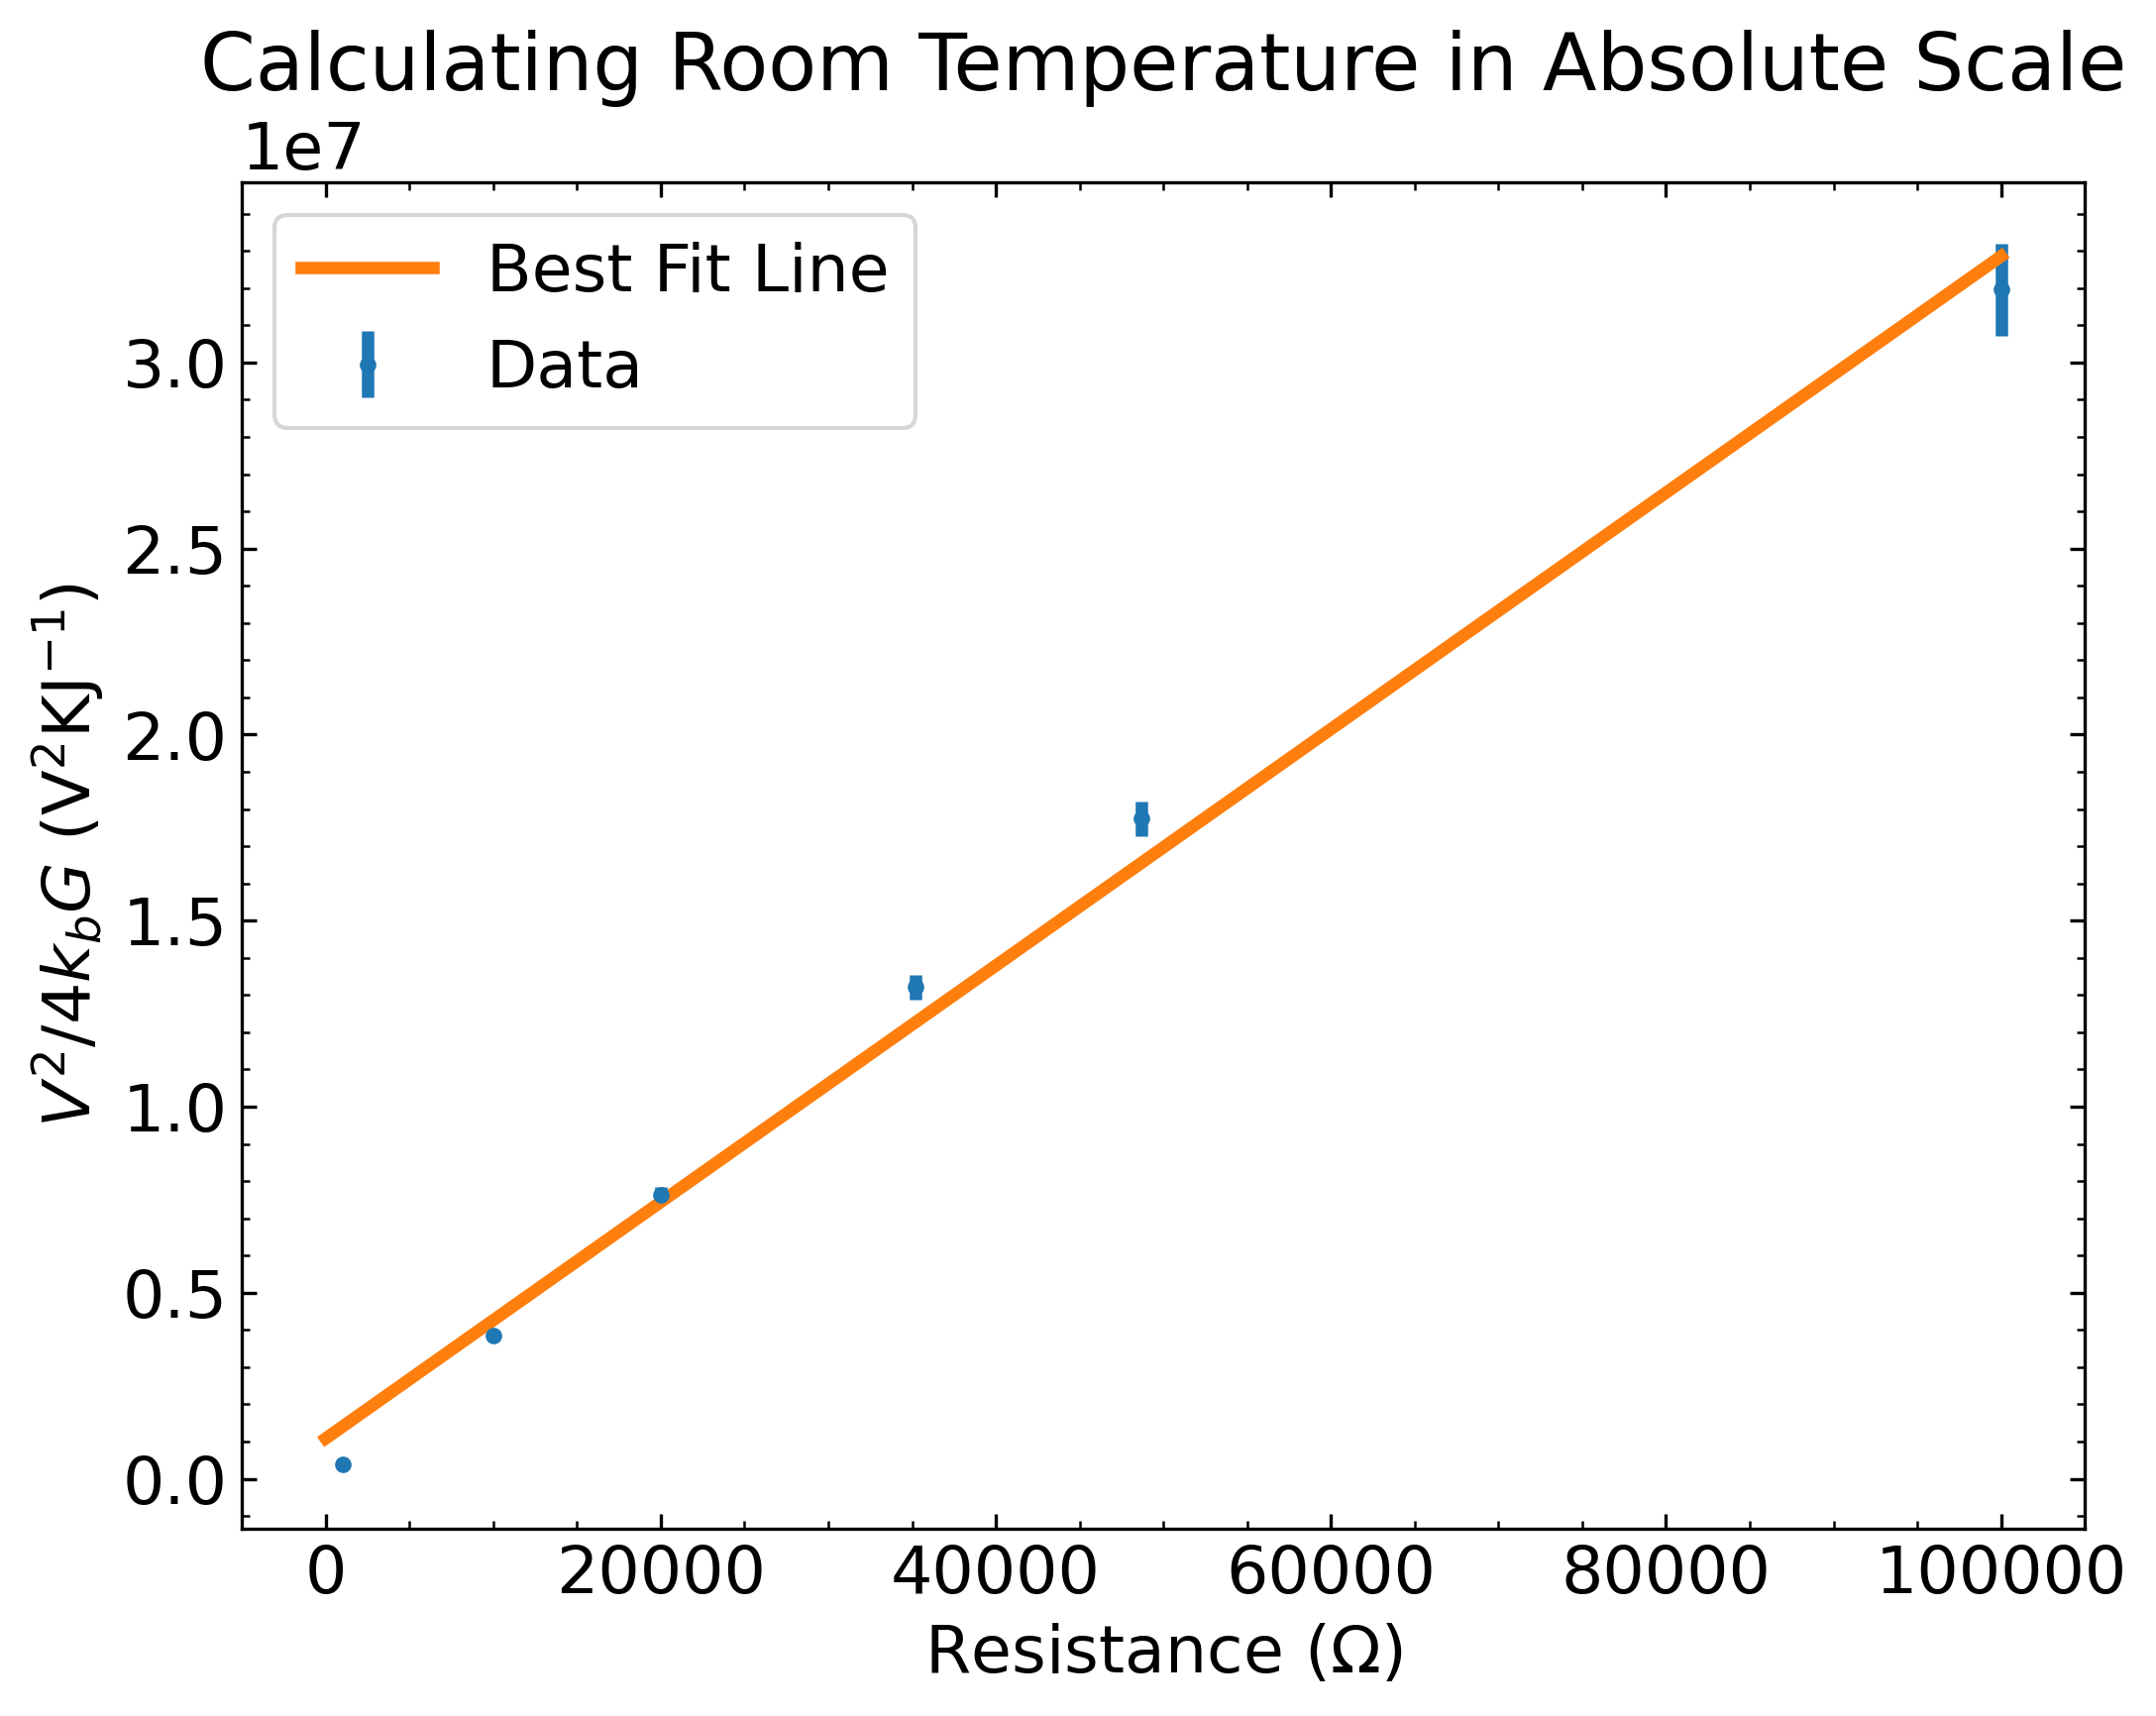

In [505]:
# Voltages
V1 = 1.97e-3
V2 = 6.201e-3
V3 = 8.727e-3
V4 = 11.443e-3
V5 = 13.226e-3
V6 = 17.56e-3

dV = np.array([0.02,0.007,0.009,0.009,0.012,0.03])*1e-3

k = 1.381e-23
V = np.array([V1,V2,V3,V4,V5,V6])
R = np.array([1,10,20,35.2,48.7,100])*1e3
T_room = 19.5
dT_room = 0.5

Abzero_acc = 273.15

y_value = V**2/(4*G*k)
dy_value = V/(2*k*G)*np.sqrt(dV**2 + (V/G)**2 * dG**2)*10


def line(x,m,b):
    return(m*x+b)

bestpar, covariance = optimize.curve_fit(line,R,y_value)
cov_unc = np.sqrt(np.diag(covariance))

m = bestpar[0]
dm = cov_unc[0]
b = bestpar[1]

Abzero_measured = m - T_room
Abz_measured_unc = np.sqrt(dm**2 + dT_room**2)

error = (Abzero_measured - Abzero_acc)/Abzero_acc * 100
z_score = (Abzero_measured - Abzero_acc)/Abz_measured_unc

print(m, "+/-", dm)
print(Abzero_measured,"+/-",Abz_measured_unc)
print(error, z_score)



plt.figure(figsize = (8,6),dpi = 300)
plt.errorbar(R,y_value,yerr = dy_value,linestyle='',marker='.',label = 'Data')
plt.xlabel(r'Resistance ($\Omega$)')
plt.ylabel(r'$V^2/4k_bG$ (V$^2$KJ$^{-1}$)')
plt.legend()
plt.title("Calculating Room Temperature in Absolute Scale", y=1.05)

x_line = np.linspace(0,1e5,1000)
y_line = m*x_line+b
plt.plot(x_line,y_line,label="Best Fit Line")
plt.legend()
plt.show()

In [307]:
G_ideal = [V**2/(4*k*R*(298))]
print(G_ideal)
print((G - G_ideal) * 1e-11)

[array([2.35755872e+11, 2.33589614e+11, 2.31328969e+11, 2.25978540e+11,
       2.18201706e+11, 1.87317818e+11])]
[[-0.53970556 -0.51807804 -0.4955778  -0.44237049 -0.36500285 -0.05885666]]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


1.4991545489549344e-23 +/ inf
1.4991545489549353e-23
8.555724037287137


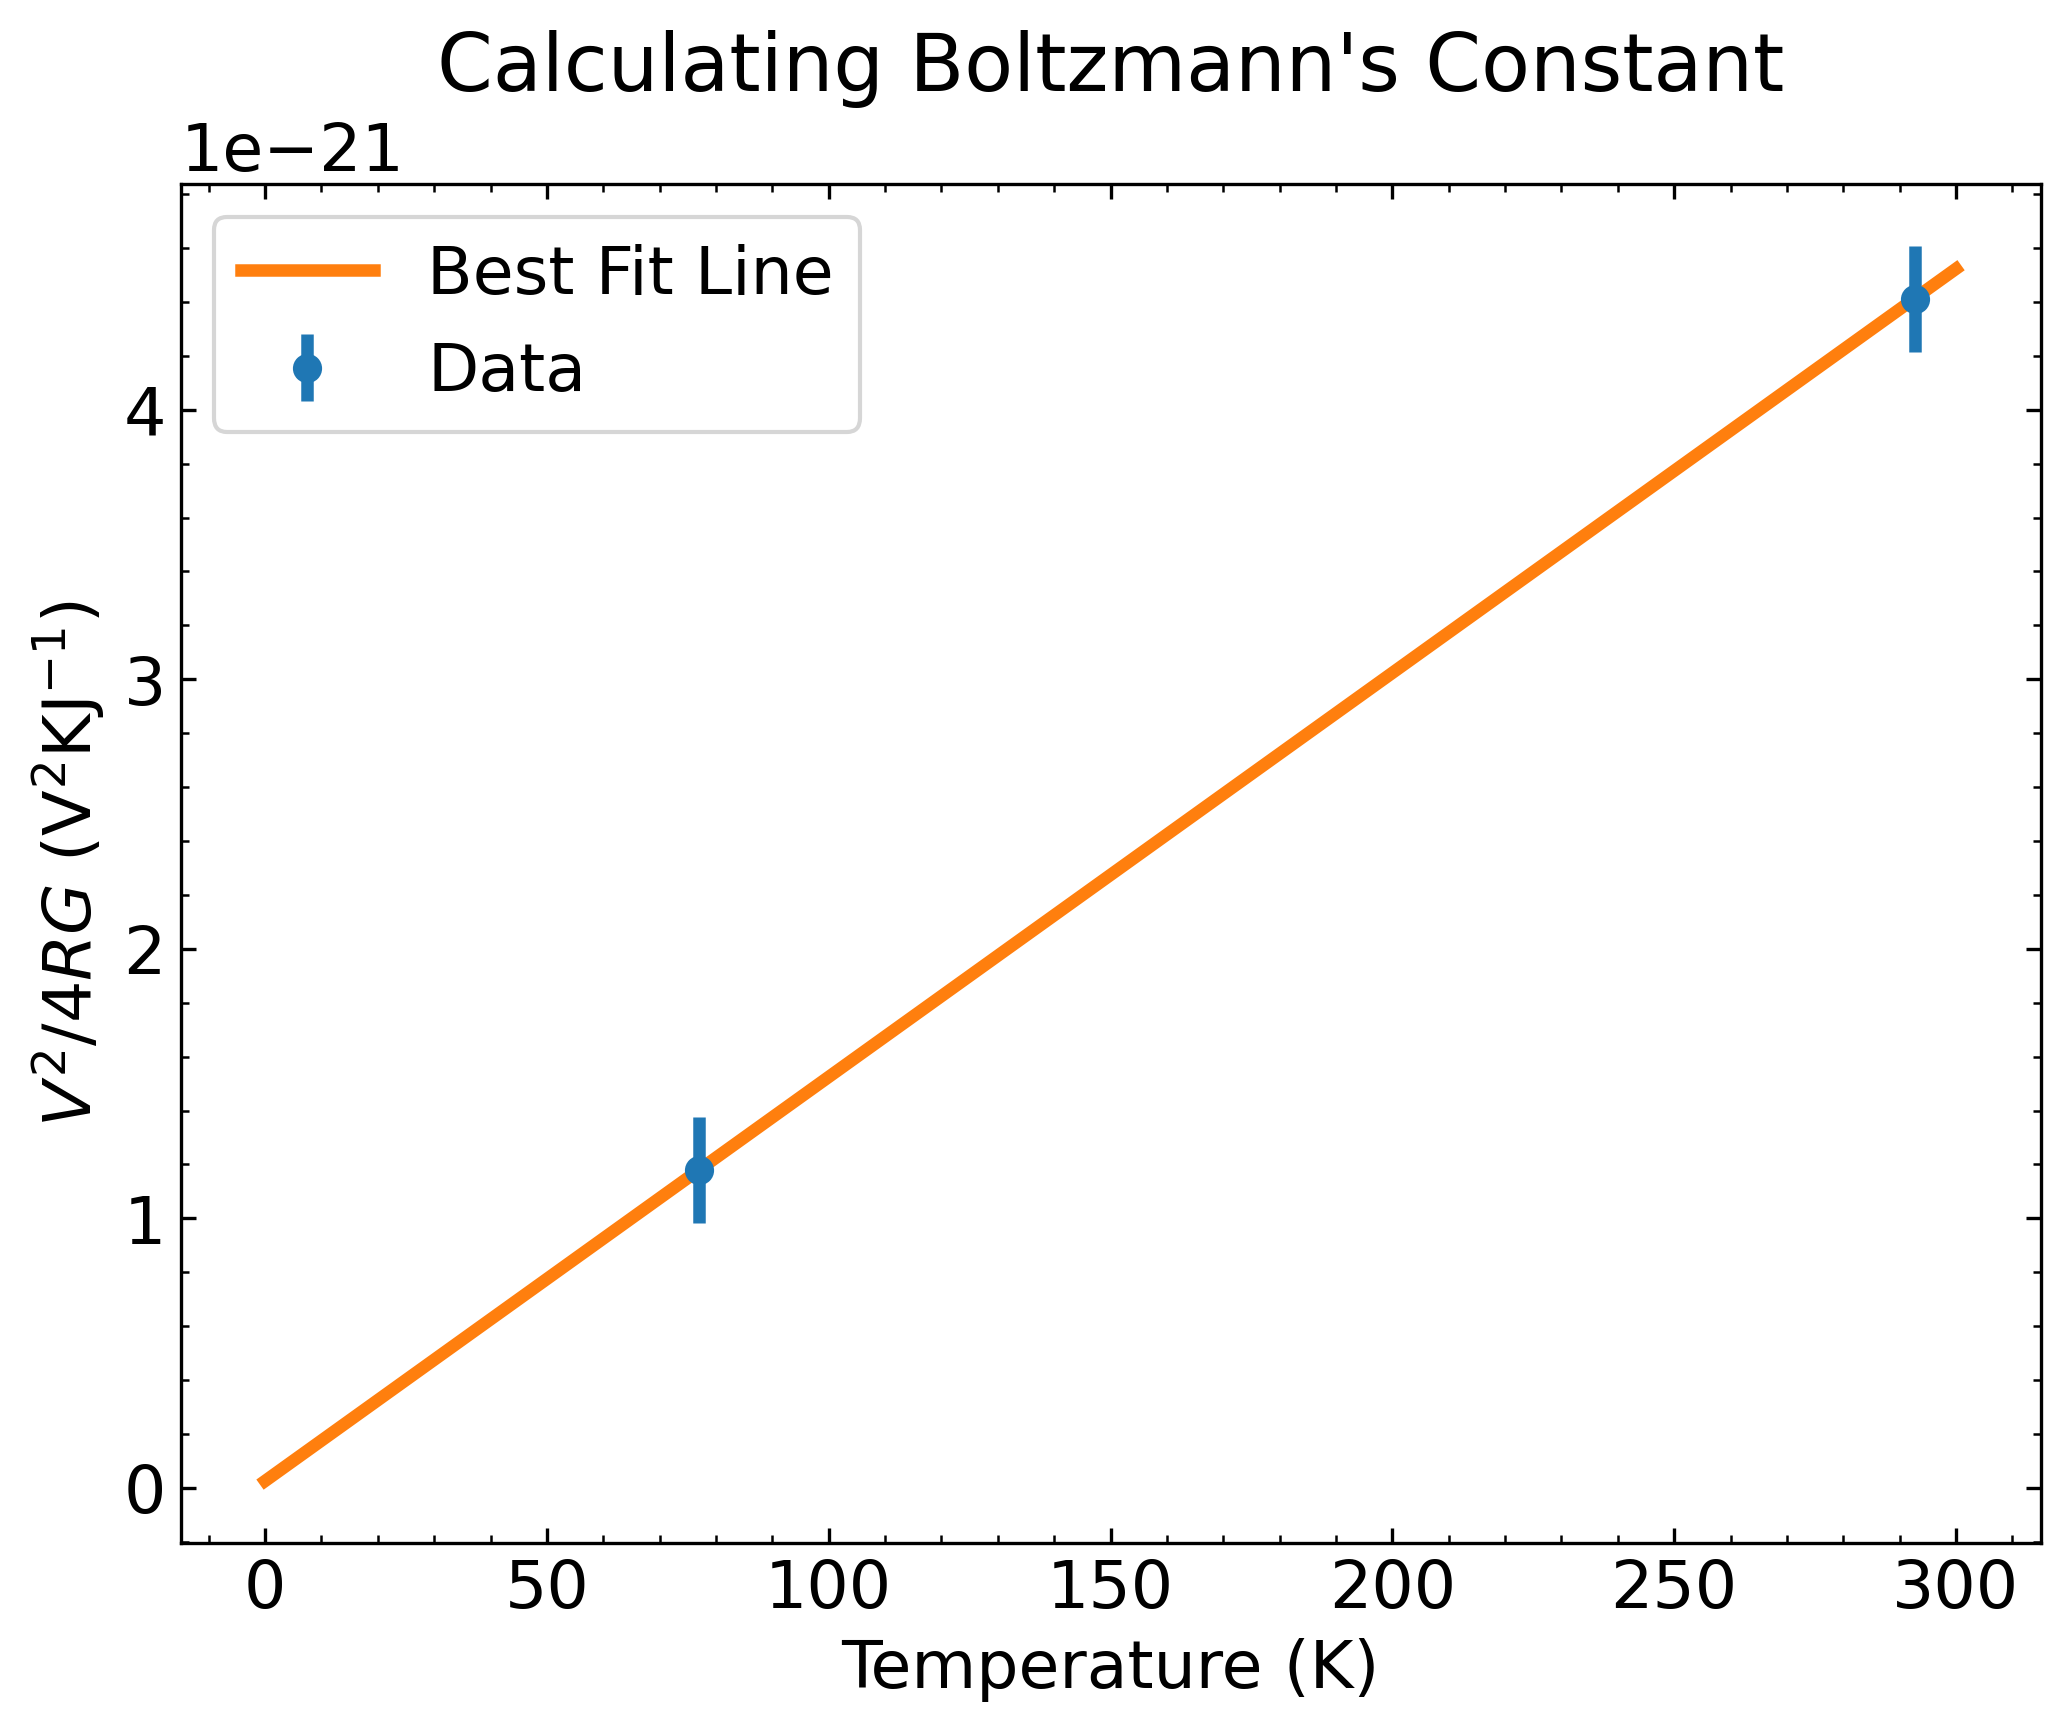

In [506]:
# Part 2
# Calculate temp of liquid nitrogen

V_cold = 9.080e-3
dV_cold = 0.006e-3

V_hot = V6

T1 = 77
T2 = 273.15 + 19.5

Y1 = V_cold**2/(4*R[5]*G[5])
dy1 = Y1 * np.sqrt((2*dV_cold/V_cold)**2+(dR[5]/R[5])**2+(dG[5]/G[5])**2)

Y2 = V_hot**2/(4*R[5]*G[5])
dy2 = dy_value[5]

T = (77, 273.15+19.5)
Y = (Y1,Y2)
Yerr = (dy1, dy2)


plt.figure(figsize = (8,6),dpi = 300)
plt.errorbar(T,Y,yerr=Y1/6,linestyle='',marker='o',label="Data")
plt.xlabel(r'Temperature (K)')
plt.ylabel(r'$V^2/4RG$ (V$^2$KJ$^{-1}$)')

plt.title("Calculating Boltzmann's Constant", y=1.05)

guess = (k,1000)
bestpar_k, covariance_k = optimize.curve_fit(line,T,Y,guess)
cov_unc_k = np.sqrt(np.diag(covariance_k))

k1 = bestpar_k[0]
dk1 = cov_unc_k[0]

print(k1,"+/",dk1)
x_new = np.linspace(0,300,1000)
plt.plot(x_new,bestpar_k[0]*x_new+bestpar_k[1],label="Best Fit Line")
plt.legend()
k_measured = (Y2-Y1)/(T2-T1)
print(k_measured)
print((k_measured-k)/k * 100)

In [462]:
print(y_value*1e-6)
print(dy_value*1e-6)

[ 0.38592626  3.83837173  7.63493549 13.20995843 17.74667662 31.9536991 ]
[0.0078703  0.01132736 0.02141581 0.03260236 0.04665782 0.12500505]


In [490]:
print(Y,Yerr)

(1.1798790603933484e-21, 4.412805845214666e-21) (7.335577853093994e-24, 1250050.4989977193)


In [491]:
print(273.15+19.5)

292.65
